## Neceassy Imports

In [1]:
import os
import numpy as np
import cv2
from PIL import Image


from tensorflow.keras.utils import to_categorical
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, UpSampling2D, Dense, Flatten, Dropout
from keras.regularizers import l1, l2
import tensorflow as tf


# from sklearn.utils import shuffle
from tensorflow.keras import regularizers

In [2]:
import PIL

PIL.__version__


'9.0.0'

## Loading the data

In [3]:
# Replace 'your_directory_path' with the path to your directory
directory_path = 'F:/Coding stuff/grpPRJ/demo/dataset/HandGesture/images'

# List all subdirectories using os.listdir()
subfolders = [f.name for f in os.scandir(directory_path) if f.is_dir()]

# Print the list of subfolder names
print(subfolders)


['okay', 'paper', 'rock', 'scissor', 'thumbs', 'up']


In [4]:
labels = subfolders
y_train = []
x_train = []
path = directory_path
for i in os.listdir(path):
    for j in os.listdir(path + "/" + i):
        im =  Image.open(path + "/" + i + '/' + j)
        im = im.resize((240,200),Image.ANTIALIAS)
        im = np.array(im)
        im = np.expand_dims(im,axis = 2)
        x_train.append(im)
        y_train.append(labels.index(i))

In [5]:
x = np.array(x_train)
y = to_categorical(y_train)

from sklearn.model_selection import train_test_split
x_train, x_val, y_train, y_val = train_test_split(x, y, train_size=0.80, random_state = 42)

In [6]:
print(x.shape)
print(y.shape)

# (5243, 200, 240, 1)
# (5243, 10)

(3155, 200, 240, 1)
(3155, 6)


## Model construction and training

In [7]:
model = Sequential()
model.add(Conv2D(16, kernel_size = 5, activation = 'relu', input_shape = (200,240,1)))
model.add(MaxPooling2D(pool_size = 2))

model.add(Conv2D(32, kernel_size = 5, activation = 'relu'))
model.add(MaxPooling2D(pool_size = 2))

model.add(Conv2D(64, kernel_size = 5, activation = 'relu'))
model.add(MaxPooling2D(pool_size = 2))

model.add(Conv2D(128, kernel_size = 5, activation = 'relu'))
model.add(MaxPooling2D(pool_size = 2))

model.add(Flatten())
model.add(Dense(32,activation = 'relu',kernel_regularizer = regularizers.l1_l2(l1 = 0.05,l2 = 0.5), bias_regularizer=l2(0.1)))
model.add(Dense(6, activation = 'softmax',kernel_regularizer = regularizers.l1_l2(l1 = 0.05, l2 = 0.5), bias_regularizer=l2(0.1)))

In [8]:
model.compile(optimizer = 'adam', loss = 'categorical_crossentropy', metrics = ['accuracy'])
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 196, 236, 16)      416       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 98, 118, 16)      0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 94, 114, 32)       12832     
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 47, 57, 32)       0         
 2D)                                                             
                                                                 
 conv2d_2 (Conv2D)           (None, 43, 53, 64)        51264     
                                                                 
 max_pooling2d_2 (MaxPooling  (None, 21, 26, 64)       0

In [9]:
logdir='logs'
from tensorflow.keras.callbacks import TensorBoard
tensorboard_callback = TensorBoard(log_dir='./logs')

In [10]:
history = model.fit(x_train, y_train, validation_data=(x_val, y_val), epochs=50, batch_size=64, callbacks=[tensorboard_callback])

Epoch 1/50
40/40 [==============================] - 19s 157ms/step - loss: 142.4250 - accuracy: 0.2310 - val_loss: 69.5244 - val_accuracy: 0.2441
Epoch 2/50
40/40 [==============================] - 4s 110ms/step - loss: 47.4896 - accuracy: 0.4616 - val_loss: 31.4530 - val_accuracy: 0.6101
Epoch 3/50
40/40 [==============================] - 4s 108ms/step - loss: 23.8220 - accuracy: 0.7377 - val_loss: 17.5902 - val_accuracy: 0.8273
Epoch 4/50
40/40 [==============================] - 4s 107ms/step - loss: 14.1646 - accuracy: 0.8558 - val_loss: 11.4335 - val_accuracy: 0.8130
Epoch 5/50
40/40 [==============================] - 4s 108ms/step - loss: 9.8245 - accuracy: 0.8653 - val_loss: 8.4843 - val_accuracy: 0.9192
Epoch 6/50
40/40 [==============================] - 4s 108ms/step - loss: 7.3839 - accuracy: 0.9061 - val_loss: 6.6327 - val_accuracy: 0.9208
Epoch 7/50
40/40 [==============================] - 4s 109ms/step - loss: 6.2703 - accuracy: 0.8962 - val_loss: 5.7116 - val_accuracy: 0.9

In [11]:
import matplotlib.pyplot as plt

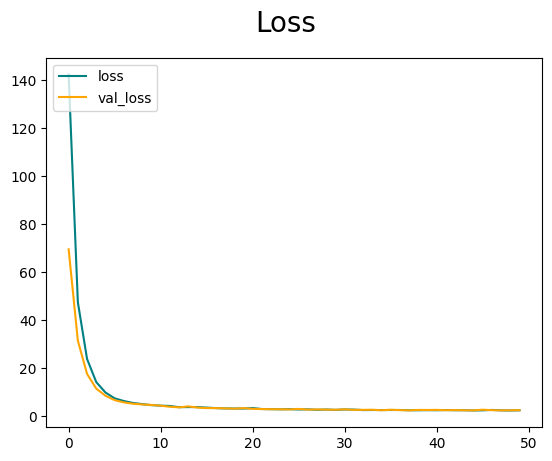

In [12]:
fig = plt.figure()
plt.plot(history.history['loss'], color='teal', label='loss')
plt.plot(history.history['val_loss'], color='orange', label='val_loss')
fig.suptitle('Loss', fontsize=20)
plt.legend(loc="upper left")
plt.show()

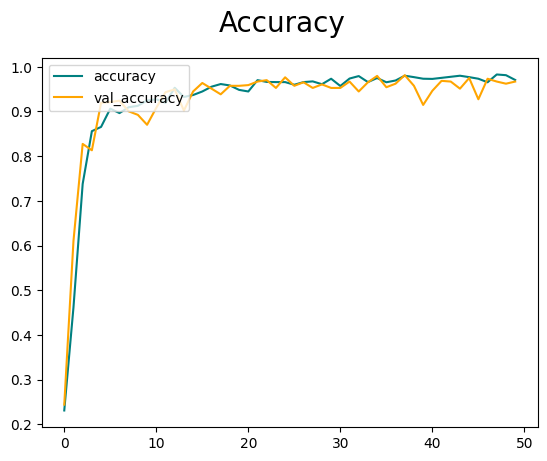

In [13]:
fig = plt.figure()
plt.plot(history.history['accuracy'], color='teal', label='accuracy')
plt.plot(history.history['val_accuracy'], color='orange', label='val_accuracy')
fig.suptitle('Accuracy', fontsize=20)
plt.legend(loc="upper left")
plt.show()

In [14]:
# model.save('emojirecog.hdf5')

In [24]:
from tensorflow.keras.models import load_model

In [25]:
model.save('F:/Coding stuff/grpPRJ/demo/best.keras')

In [26]:
model = tf.keras.models.load_model('F:/Coding stuff/grpPRJ/demo/best.keras')

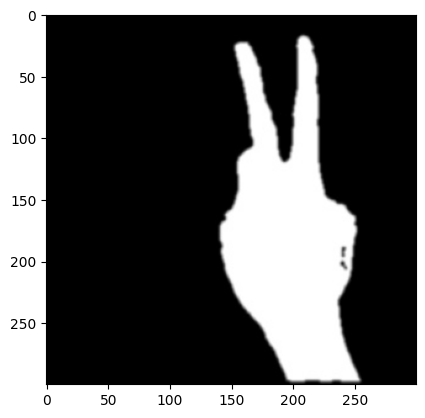

In [27]:
img = cv2.imread('F:/Coding stuff/grpPRJ/demo/test/test folder/SCISSOR/scissor2.jpg')
# grpPRJ/demo/test/test folder/SCISSOR/scissor1.jpg
plt.imshow(img)
plt.show()

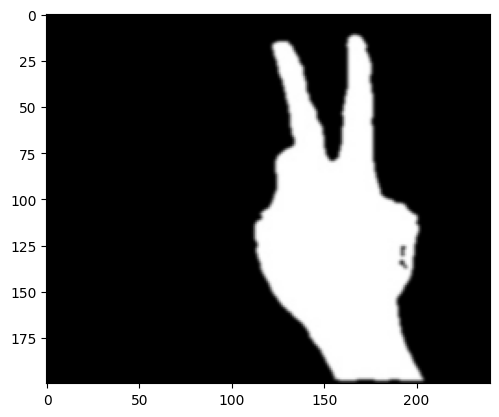

In [28]:
resize = tf.image.resize(img, (200,240))
plt.imshow(resize.numpy().astype(int))
plt.show()

In [29]:
# Assuming 'image' is your EagerTensor with shape (None, 200, 240, 3)
grayscale_image = tf.image.rgb_to_grayscale(resize)

In [30]:
yhat = model.predict(np.expand_dims(grayscale_image, 0))
yhat
max_position = np.argmax(yhat)
labels[max_position]
# max_position

1/1 [==============================] - 0s 83ms/step


'up'

In [31]:
len(labels)

6

In [32]:
labels

['okay', 'paper', 'rock', 'scissor', 'thumbs', 'up']